# Importação de Dados

In [1]:
#importando bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importando o DATASET (já separado)
train = pd.read_csv('train.csv') #dados para TREINO e TRESTE
predict = pd.read_csv('test.csv') #dados para PREVISÃO

In [3]:
print(train.shape, predict.shape)

(891, 12) (418, 11)


In [4]:
#visualizando os dados
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#quant de NaN em cada coluna
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
predict.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
women = train[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [9]:
men = train[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [10]:
upper_class = train[train.Pclass == 1]["Survived"]
rate_upper_class = sum(upper_class)/len(upper_class)

print("% of upper class who survived:", rate_upper_class)

% of upper class who survived: 0.6296296296296297


In [11]:
middle_class = train[train.Pclass == 2]["Survived"]
rate_middle_class = sum(middle_class)/len(middle_class)

print("% of middle class who survived:", rate_middle_class)

% of middle class who survived: 0.47282608695652173


In [12]:
lower_class = train[train.Pclass == 3]['Survived']
rate_lower_class = sum(lower_class)/len(lower_class)

print("% of lower class who survived:", rate_lower_class)

% of lower class who survived: 0.24236252545824846


# Preparando Dados

In [13]:
#conferir os dados nas colunas que seram ultilizadas
print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
def transformar_Sex(sex):
    '''transforma os valores da coluna 'Sex' em valores numericos'''
    if sex == 'female':
        return 1
    elif sex == 'male':
        return 0
    
def transformar_Embarked(porto):
    '''transforma os valores da coluna 'Embarked' em valores numericos'''
    if porto == 'S':
        return 1
    elif porto == 'C':
        return 2
    elif porto == 'Q':
        return 3

In [15]:
#criar um nova coluna nos dados de treino e teste
train['Sex_num'] = train['Sex'].map(transformar_Sex)
train['Embarked_num'] = train['Embarked'].map(transformar_Embarked)

predict['Sex_num'] = predict['Sex'].map(transformar_Sex)
predict['Embarked_num'] = predict['Embarked'].map(transformar_Embarked)

#.map aplica a função argumento em todas as linhas
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  
0      0         A/5 21171   7.2500   NaN        S        0           1.0  
1      0          PC 17599  71.2833   C85        C        1           2.0  
2      0  STON/O2. 3101282   7.9250   NaN        S        1           1.0  
3      0            113803  53.1000  C123        S        1           1.0  
4      0            373450   8.0500   NaN        S        0           1.0

In [16]:
predict.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  
0  34.5      0      0   330911   7.8292   NaN        Q        0             3  
1  47.0      1      0   363272   7.0000   NaN        S        1             1  
2  62.0      0      0   240276   9.6875   NaN        Q        0             3  
3  27.0      0      0   315154   8.6625   NaN        S        0             1  
4  22.0      1      1  3101298  12.2875   NaN        S        1             1

In [17]:
#separar varieaveis de entrada e alvo (para trino)
variaveis = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Embarked_num']
x = train[variaveis]
y = train['Survived']
x_predict = predict[variaveis]

In [18]:
x.describe()
#coluna 'Age' e 'Embarked_num' tem count menor que o total de linhas, existem valores NaN nelas

Pclass         Age       SibSp       Parch        Fare     Sex_num  \
count  891.000000  714.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642   29.699118    0.523008    0.381594   32.204208    0.352413   
std      0.836071   14.526497    1.102743    0.806057   49.693429    0.477990   
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   20.125000    0.000000    0.000000    7.910400    0.000000   
50%      3.000000   28.000000    0.000000    0.000000   14.454200    0.000000   
75%      3.000000   38.000000    1.000000    0.000000   31.000000    1.000000   
max      3.000000   80.000000    8.000000    6.000000  512.329200    1.000000   

       Embarked_num  
count    889.000000  
mean       1.362205  
std        0.636157  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        3.000000

In [19]:
#.fillna troca todos os NaN pelo valor do argumento
x = x.fillna(-1)
x_predict = x_predict.fillna(-1)
# usamos -1 pois é um valores nao nao representa nada em nenhum dos casos 'Age' e 'Embarked_num'

In [20]:
#conferindo se as colunas estao na mesma ordem
x.head()

Pclass   Age  SibSp  Parch     Fare  Sex_num  Embarked_num
0       3  22.0      1      0   7.2500        0           1.0
1       1  38.0      1      0  71.2833        1           2.0
2       3  26.0      0      0   7.9250        1           1.0
3       1  35.0      1      0  53.1000        1           1.0
4       3  35.0      0      0   8.0500        0           1.0

In [21]:
x_predict.head()

Pclass   Age  SibSp  Parch     Fare  Sex_num  Embarked_num
0       3  34.5      0      0   7.8292        0             3
1       3  47.0      1      0   7.0000        1             1
2       2  62.0      0      0   9.6875        0             3
3       3  27.0      0      0   8.6625        0             1
4       3  22.0      1      1  12.2875        1             1

# Criando Modelo

In [22]:
#importando modelo Random Forest (testar outros modelos futuramente)
from sklearn.ensemble import RandomForestClassifier

In [23]:
#documentação do modelo:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

# Validação (teste)

In [24]:
#teste com valores que conhecemos para ajustar o modelo
from sklearn.model_selection import train_test_split
#seed para aleaotiedade do programa
np.random.seed(0)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [26]:
modelo.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
predict_test = modelo.predict(x_test)

In [28]:
#calculo da acurracia (media dos acertos da previsão)
np.mean(predict_test == y_test)

0.8067226890756303

# Validação Cruzada

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [30]:
#obj KFold que divide em n (3 no caso) blocos o que for passado no argumento de .split
kf = KFold(3, shuffle=True, random_state=0)
# (shuffle=) se True, cria blocos aleatorios

#EXEMPLO DE COMO USAR KFOLD
x_falso = np.arange(20)
for train_lines, test_lines in kf.split(x_falso):
    print('linhas de treino: ',train_lines)
    print('linhas de teste: ',test_lines)
    print(type(train_lines))
    print()

linhas de treino:  [ 0  2  3  4  5  7  9 11 12 13 14 15 16]
linhas de teste:  [ 1  6  8 10 17 18 19]
<class 'numpy.ndarray'>

linhas de treino:  [ 0  1  3  6  8 10 11 12 15 16 17 18 19]
linhas de teste:  [ 2  4  5  7  9 13 14]
<class 'numpy.ndarray'>

linhas de treino:  [ 1  2  4  5  6  7  8  9 10 13 14 17 18 19]
linhas de teste:  [ 0  3 11 12 15 16]
<class 'numpy.ndarray'>



In [31]:
resultados_acc = []
#cada repetição tem uma seed diferente, mudandos a aleatoriedade dos splits
for rep in range(10):

    kf = KFold(2, shuffle=True, random_state=rep)
    print('REPETIÇÃO: ',rep)
    #a linha de treino de um bloco é igual as linhas de teste de todos os outros
    for train_lines, test_lines in kf.split(x):
        print('linhas de treino: ',train_lines.shape[0])
        print('linhas de teste: ',test_lines.shape[0])
        #novos x_train/_test são as linhas separadas nos blocos do kf
        x_train = x.iloc[train_lines]
        x_test = x.iloc[test_lines]
        y_train = y.iloc[train_lines]
        y_test = y.iloc[test_lines]
        #.iloc[] recebe como argumento os linhas, colunas que serão localizadas (iloc so recebe numeros)
        #loc[] é igaul e tambem serve com str
        print()
        #print(x_train.head())
        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(x_train, y_train)
        predict_test = modelo.predict(x_test)
        acc = np.mean(predict_test == y_test)
        resultados_acc.append(acc)
        print('Acc: ',acc)
        print('##############################################################')
        print()

REPETIÇÃO:  0
linhas de treino:  445
linhas de teste:  446

Acc:  0.7780269058295964
##############################################################

linhas de treino:  446
linhas de teste:  445

Acc:  0.8
##############################################################

REPETIÇÃO:  1
linhas de treino:  445
linhas de teste:  446

Acc:  0.773542600896861
##############################################################

linhas de treino:  446
linhas de teste:  445

Acc:  0.8202247191011236
##############################################################

REPETIÇÃO:  2
linhas de treino:  445
linhas de teste:  446

Acc:  0.827354260089686
##############################################################

linhas de treino:  446
linhas de teste:  445

Acc:  0.7752808988764045
##############################################################

REPETIÇÃO:  3
linhas de treino:  445
linhas de teste:  446

Acc:  0.7690582959641256
##############################################################

linhas de treino

In [32]:
# RepeatedKFold faz a mesma coisa que o primeiro for da ultima celula
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
#ctrl+c, ctrl+v da ultima celula
for train_lines, test_lines in kf.split(x):
    print('linhas de treino: ',train_lines.shape[0])
    print('linhas de teste: ',test_lines.shape[0])
    #novos x_train/_test são as linhas separadas nos blocos do kf
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    #.iloc[] recebe como argumento os linhas que serão separadas paradas
    print()
    #print(x_train.head())
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
    print()

linhas de treino:  445
linhas de teste:  446

Acc:  0.7847533632286996

linhas de treino:  446
linhas de teste:  445

Acc:  0.7640449438202247

linhas de treino:  445
linhas de teste:  446

Acc:  0.8228699551569507

linhas de treino:  446
linhas de teste:  445

Acc:  0.7932584269662921

linhas de treino:  445
linhas de teste:  446

Acc:  0.7892376681614349

linhas de treino:  446
linhas de teste:  445

Acc:  0.7752808988764045

linhas de treino:  445
linhas de teste:  446

Acc:  0.8071748878923767

linhas de treino:  446
linhas de teste:  445

Acc:  0.7707865168539326

linhas de treino:  445
linhas de teste:  446

Acc:  0.8071748878923767

linhas de treino:  446
linhas de teste:  445

Acc:  0.7932584269662921

linhas de treino:  445
linhas de teste:  446

Acc:  0.804932735426009

linhas de treino:  446
linhas de teste:  445

Acc:  0.797752808988764

linhas de treino:  445
linhas de teste:  446

Acc:  0.8116591928251121

linhas de treino:  446
linhas de teste:  445

Acc:  0.786516853932

In [33]:
#media das acuracias
np.mean(resultados_acc)

0.7968507834937271

(array([2., 2., 6., 2., 8., 6., 4., 3., 3., 4.]),
 array([0.75730337, 0.76498111, 0.77265884, 0.78033657, 0.78801431,
        0.79569204, 0.80336978, 0.81104751, 0.81872525, 0.82640298,
        0.83408072]),
 <a list of 10 Patch objects>)

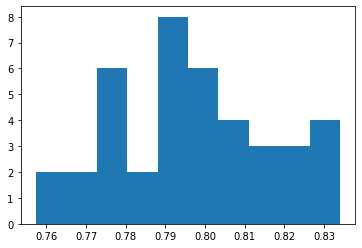

In [34]:
#visualização das acuracias dos testes
from matplotlib.pyplot import hist
hist(resultados_acc)

# Retreinando e Aplicando Modelo

In [35]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(x, y)
predict_result = modelo.predict(x_predict)

In [36]:
predict_result

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
resultados = pd.Series(predict_result, index=predict['PassengerId'], name='Survived')
# (index=) troca a coluna de indices pela coluna passada como argumento,
# assumindo o nome da coluno argumento também
# (name=) nome da coluno
resultados.head()

PassengerId
892    0
893    0
894    0
895    1
896    0
Name: Survived, dtype: int64

In [38]:
#.to_csv cria um arquivo csv com a Serie/DataFrame
resultados.to_csv('Resultados2_RF.csv', header=True )
#visualizando os arquivo criado
arq_result = pd.read_csv('Resultados2_RF.csv')
arq_result
#0.73 de acc no kaggle :(

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

## Análise de Erro

In [39]:
#rodamos a validação cruzada de novo
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)

Acc:  0.7847533632286996
Acc:  0.7640449438202247
Acc:  0.8228699551569507
Acc:  0.7932584269662921
Acc:  0.7892376681614349
Acc:  0.7752808988764045
Acc:  0.8071748878923767
Acc:  0.7707865168539326
Acc:  0.8071748878923767
Acc:  0.7932584269662921
Acc:  0.804932735426009
Acc:  0.797752808988764
Acc:  0.8116591928251121
Acc:  0.7865168539325843
Acc:  0.7914798206278026
Acc:  0.7932584269662921
Acc:  0.827354260089686
Acc:  0.8
Acc:  0.7982062780269058
Acc:  0.802247191011236


In [40]:
#escolhemos um dos blocos de validação (o último no caso) para estudar
#em x_check colocamos todas as linhas do bloco com todas as variaveis (inclusive as não utilizadas)
#tambem colocamos a previsões para o bloco
x_check = train.iloc[test_lines].copy()
x_check['p'] = predict_test
x_check.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  p  
0      0         A/5 21171   7.2500   NaN        S        0           1.0  1  
1      0          PC 17599  71.2833   C85        C        1           2.0  1  
2      0  STON/O2. 3101282   7.9250   NaN        S        1           1.0  0  
3      0            113803  53.1000  C123        S        1           1.0  1  
4      0            373450   8.0500   NaN        S        0           1.0  0

In [41]:
#separamos apenas os casos em que o modelo errou para estudarmos melhor os padrões
erros = x_check[x_check['Survived']!=x_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
               'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num', 'Embarked_num', 'Survived', 'p']]
erros.head()

PassengerId  Pclass                          Name     Sex   Age  SibSp  \
0             1       3       Braund, Mr. Owen Harris    male  22.0      1   
2             3       3        Heikkinen, Miss. Laina  female  26.0      0   
21           22       2         Beesley, Mr. Lawrence    male  34.0      0   
22           23       3   McGowan, Miss. Anna "Annie"  female  15.0      0   
23           24       1  Sloper, Mr. William Thompson    male  28.0      0   

    Parch            Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  \
0       0         A/5 21171   7.2500   NaN        S        0           1.0   
2       0  STON/O2. 3101282   7.9250   NaN        S        1           1.0   
21      0            248698  13.0000   D56        S        0           1.0   
22      0            330923   8.0292   NaN        Q        1           3.0   
23      0            113788  35.5000    A6        S        0           1.0   

    Survived  p  
0          0  1  
2          1  0  
21         1  0  
22         1  0  
23         1  0

In [42]:
#separamos os erros em grupos (homens e mulheres no caso) para analisarmos especificamente cada 
erros_mulheres = erros[ erros['Sex'] == 'female' ]
erros_homens = erros[ erros['Sex'] == 'male' ]

In [43]:
erros_mulheres.sort_values('p')

PassengerId  Pclass                                               Name  \
2              3       3                             Heikkinen, Miss. Laina   
677          678       3                            Turja, Miss. Anna Sofia   
691          692       3                                 Karun, Miss. Manca   
830          831       3            Yasbeck, Mrs. Antoni (Selini Alexander)   
233          234       3                     Asplund, Miss. Lillian Gertrud   
192          193       3    Andersen-Jensen, Miss. Carla Christine Nielsine   
216          217       3                             Honkanen, Miss. Eliina   
142          143       3  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...   
85            86       3  Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...   
855          856       3                         Aks, Mrs. Sam (Leah Rosen)   
25            26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
22            23       3                        McGowan, Miss. Anna "Annie"   
554          555       3                                 Ohman, Miss. Velin   
654          655       3                       Hegarty, Miss. Hanora "Nora"   
852          853       3                            Boulos, Miss. Nourelain   
772          773       2                                  Mack, Mrs. (Mary)   
854          855       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)   
498          499       1    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
502          503       3                     O'Sullivan, Miss. Bridget Mary   
501          502       3                                Canavan, Miss. Mary   
882          883       3                       Dahlberg, Miss. Gerda Ulrika   
474          475       3                        Strandberg, Miss. Ida Sofia   
419          420       3                          Van Impe, Miss. Catharina   
357          358       2                          Funk, Miss. Annie Clemmer   
254          255       3           Rosblom, Mrs. Viktor (Helena Wilhelmina)   
177          178       1                         Isham, Miss. Ann Elizabeth   
49            50       3      Arnold-Franchi, Mrs. Josef (Josefine Franchi)   
503          504       3                     Laitinen, Miss. Kristina Sofia   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch            Ticket      Fare    Cabin Embarked  \
2    female  26.0      0      0  STON/O2. 3101282    7.9250      NaN        S   
677  female  18.0      0      0              4138    9.8417      NaN        S   
691  female   4.0      0      1            349256   13.4167      NaN        C   
830  female  15.0      1      0              2659   14.4542      NaN        C   
233  female   5.0      4      2            347077   31.3875      NaN        S   
192  female  19.0      1      0            350046    7.8542      NaN        S   
216  female  27.0      0      0  STON/O2. 3101283    7.9250      NaN        S   
142  female  24.0      1      0  STON/O2. 3101279   15.8500      NaN        S   
85   female  33.0      3      0           3101278   15.8500      NaN        S   
855  female  18.0      0      1            392091    9.3500      NaN        S   
25   female  38.0      1      5            347077   31.3875      NaN        S   
22   female  15.0      0      0            330923    8.0292      NaN        Q   
554  female  22.0      0      0            347085    7.7750      NaN        S   
654  female  18.0      0      0            365226    6.7500      NaN        Q   
852  female   9.0      1      1              2678   15.2458      NaN        C   
772  female  57.0      0      0       S.O./P.P. 3   10.5000      E77        S   
854  female  44.0      1      0            244252   26.0000      NaN        S   
498  female  25.0      1      2            113781  151.5500  C22 C26        S   
502  female   NaN      0      0            330909    7.6292      NaN        Q   
501  female  2

In [44]:
#estudar os dados para conhecer todos os titulos
lista_titulos=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

In [45]:

def titulo_num(titulo):
    '''Transforma os titulos em variaveis numericas'''
    if titulo == 'Mrs':
        return 0
    elif titulo == 'Mr':
        return 1
    elif titulo == 'Master':
        return 2
    elif titulo == 'Miss':
        return 3
    elif titulo == 'Major':
        return 0
    elif titulo == 'Rev':
        return 0
    elif titulo == 'Dr':
        return 0
    elif titulo == 'Ms':
        return 3
    elif titulo == 'Mlle':
        return 3
    elif titulo == 'Col':
        return 1
    elif titulo == 'Capt':
        return 1
    elif titulo == 'Mme':
        return 0
    elif titulo == 'Countess':
        return 0
    elif titulo == 'Don':
        return 1
    elif titulo == 'Jonkheer':
        return 1

    
def titulo_nos_nomes(nome):
    '''Separa os titulos dos nomes e retorna eles transformados em numeros'''
    for titulo in lista_titulos:
        if titulo in nome:
            return titulo_num(titulo)
    return -1

In [46]:
#criando a nova coluna nos df
train['Title_num'] = train['Name'].map(titulo_nos_nomes)
predict['Title_num'] = predict['Name'].map(titulo_nos_nomes)

predict.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  \
0  34.5      0      0   330911   7.8292   NaN        Q        0             3   
1  47.0      1      0   363272   7.0000   NaN        S        1             1   
2  62.0      0      0   240276   9.6875   NaN        Q        0             3   
3  27.0      0      0   315154   8.6625   NaN        S        0             1   
4  22.0      1      1  3101298  12.2875   NaN        S        1             1   

   Title_num  
0          1  
1          0  
2          1  
3          1  
4          0

In [47]:
train['Title_num'].value_counts()

1    523
3    182
0    146
2     40
Name: Title_num, dtype: int64

In [48]:
predict.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  \
0  34.5      0      0   330911   7.8292   NaN        Q        0             3   
1  47.0      1      0   363272   7.0000   NaN        S        1             1   
2  62.0      0      0   240276   9.6875   NaN        Q        0             3   
3  27.0      0      0   315154   8.6625   NaN        S        0             1   
4  22.0      1      1  3101298  12.2875   NaN        S        1             1   

   Title_num  
0          1  
1          0  
2          1  
3          1  
4          0

In [49]:
variaveis = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Embarked_num', 'Title_num']
x = train[variaveis]
y = train['Survived']
x_predict = predict[variaveis]

In [50]:
x.describe()

Pclass         Age       SibSp       Parch        Fare     Sex_num  \
count  891.000000  714.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642   29.699118    0.523008    0.381594   32.204208    0.352413   
std      0.836071   14.526497    1.102743    0.806057   49.693429    0.477990   
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   20.125000    0.000000    0.000000    7.910400    0.000000   
50%      3.000000   28.000000    0.000000    0.000000   14.454200    0.000000   
75%      3.000000   38.000000    1.000000    0.000000   31.000000    1.000000   
max      3.000000   80.000000    8.000000    6.000000  512.329200    1.000000   

       Embarked_num   Title_num  
count    889.000000  891.000000  
mean       1.362205    1.289562  
std        0.636157    0.971095  
min        1.000000    0.000000  
25%        1.000000    1.000000  
50%        1.000000    1.000000  
75%        2.000000    1.000000  
max        3.000000    3.000000

In [51]:
#Como colocar a media da coluna nos NaN
'''x['Fare'].fillna(x['Fare'].dropna().median(), inplace=True)
x_predict['Fare'].fillna(x_predict['Fare'].dropna().median(), inplace=True)'''

"x['Fare'].fillna(x['Fare'].dropna().median(), inplace=True)\nx_predict['Fare'].fillna(x_predict['Fare'].dropna().median(), inplace=True)"

<function matplotlib.pyplot.show(*args, **kw)>

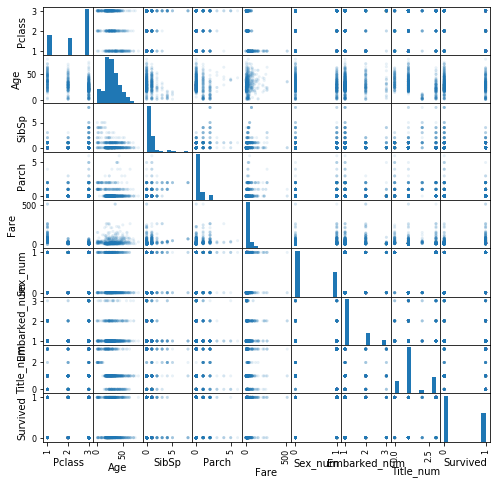

In [52]:
data = x.copy()
data['Survived'] = y.copy()
pd.plotting.scatter_matrix(data, figsize=(8,8), marker = '.', alpha=0.1, diagonal='hist', range_padding=0.2)
plt.show

In [53]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#minmaxscaler coloca todos os valores entre (em escala), entre 0 e 1


In [54]:
#fit_transform estuda e ja transformas os dados passados como argumento
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=variaveis)

x_predict = scaler.fit_transform(x_predict)
x_predict = pd.DataFrame(x_predict, columns=variaveis)

x = x.fillna(-1)
x_predict = x_predict.fillna(-1)

x.describe()

Pclass         Age       SibSp       Parch        Fare     Sex_num  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.654321    0.096179    0.065376    0.063599    0.062858    0.352413   
std      0.418036    0.570005    0.137843    0.134343    0.096995    0.477990   
min      0.000000   -1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.500000    0.070118    0.000000    0.000000    0.015440    0.000000   
50%      1.000000    0.296306    0.000000    0.000000    0.028213    0.000000   
75%      1.000000    0.434531    0.125000    0.000000    0.060508    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Embarked_num   Title_num  
count    891.000000  891.000000  
mean       0.178451    0.429854  
std        0.322606    0.323698  
min       -1.000000    0.000000  
25%        0.000000    0.333333  
50%        0.000000    0.333333  
75%        0.500000    0.333333  
max        1.000000    1.000000

In [55]:
x.head(20)

Pclass       Age  SibSp     Parch      Fare  Sex_num  Embarked_num  \
0      1.0  0.271174  0.125  0.000000  0.014151      0.0           0.0   
1      0.0  0.472229  0.125  0.000000  0.139136      1.0           0.5   
2      1.0  0.321438  0.000  0.000000  0.015469      1.0           0.0   
3      0.0  0.434531  0.125  0.000000  0.103644      1.0           0.0   
4      1.0  0.434531  0.000  0.000000  0.015713      0.0           0.0   
5      1.0 -1.000000  0.000  0.000000  0.016510      0.0           1.0   
6      0.0  0.673285  0.000  0.000000  0.101229      0.0           0.0   
7      1.0  0.019854  0.375  0.166667  0.041136      0.0           0.0   
8      1.0  0.334004  0.000  0.333333  0.021731      1.0           0.0   
9      0.5  0.170646  0.125  0.000000  0.058694      1.0           0.5   
10     1.0  0.044986  0.125  0.166667  0.032596      1.0           0.0   
11     0.0  0.723549  0.000  0.000000  0.051822      1.0           0.0   
12     1.0  0.246042  0.000  0.000000  0.015713      0.0           0.0   
13     1.0  0.484795  0.125  0.833333  0.061045      0.0           0.0   
14     1.0  0.170646  0.000  0.000000  0.015330      1.0           0.0   
15     0.5  0.685851  0.000  0.000000  0.031230      1.0           0.0   
16     1.0  0.019854  0.500  0.166667  0.056848      0.0           1.0   
17     0.5 -1.000000  0.000  0.000000  0.025374      0.0           0.0   
18     1.0  0.384267  0.125  0.000000  0.035134      1.0           0.0   
19     1.0 -1.000000  0.000  0.000000  0.014102      1.0           0.5   

    Title_num  
0    0.333333  
1    0.000000  
2    1.000000  
3    0.000000  
4    0.333333  
5    0.333333  
6    0.333333  
7    0.666667  
8    0.000000  
9    0.000000  
10   1.000000  
11   1.000000  
12   0.333333  
13   0.333333  
14   1.000000  
15   0.000000  
16   0.666667  
17   0.333333  
18   0.000000  
19   0.000000

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

models = [LogisticRegression(random_state=0), DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(), SVC(random_state=0), RandomForestClassifier(random_state=0),
         LinearSVC(random_state=0), GaussianNB(), Perceptron(random_state=0), 
          SGDClassifier(random_state=0)]
          #KNN nao tem o parametro random_state

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test,y_pred),type(model))

0.7871148459383753 <class 'sklearn.linear_model._logistic.LogisticRegression'>
0.7955182072829131 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7955182072829131 <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.8095238095238095 <class 'sklearn.svm._classes.SVC'>
0.8207282913165266 <class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7899159663865546 <class 'sklearn.svm._classes.LinearSVC'>
0.7843137254901961 <class 'sklearn.naive_bayes.GaussianNB'>
0.6358543417366946 <class 'sklearn.linear_model._perceptron.Perceptron'>
0.7927170868347339 <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


Acc:  0.7982062780269058
Acc:  0.7730337078651686
Acc:  0.7892376681614349
Acc:  0.7797752808988764
Acc:  0.7847533632286996
Acc:  0.7932584269662921
Acc:  0.7982062780269058
Acc:  0.797752808988764
Acc:  0.7869955156950673
Acc:  0.7865168539325843
Acc:  0.7982062780269058
Acc:  0.7910112359550562
Acc:  0.8026905829596412
Acc:  0.7730337078651686
Acc:  0.7914798206278026
Acc:  0.755056179775281
Acc:  0.8026905829596412
Acc:  0.7752808988764045
Acc:  0.7892376681614349
Acc:  0.7932584269662921

Acc média:  0.7944370055927849


(array([ 2.,  5.,  9.,  8., 19., 15.,  9.,  4.,  4.,  5.]),
 array([0.75505618, 0.76295863, 0.77086109, 0.77876354, 0.78666599,
        0.79456845, 0.8024709 , 0.81037336, 0.81827581, 0.82617826,
        0.83408072]),
 <a list of 10 Patch objects>)

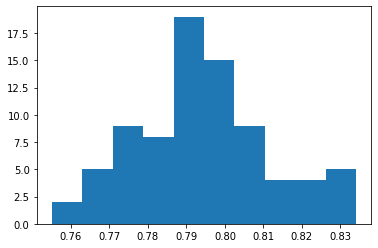

In [57]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LogisticRegression(random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.7376681614349776
Acc:  0.7573033707865169
Acc:  0.7645739910313901
Acc:  0.8
Acc:  0.7690582959641256
Acc:  0.7797752808988764
Acc:  0.7847533632286996
Acc:  0.748314606741573
Acc:  0.7623318385650224
Acc:  0.7865168539325843
Acc:  0.7825112107623319
Acc:  0.7078651685393258
Acc:  0.7623318385650224
Acc:  0.7460674157303371
Acc:  0.7914798206278026
Acc:  0.7707865168539326
Acc:  0.7914798206278026
Acc:  0.7730337078651686
Acc:  0.7399103139013453
Acc:  0.7528089887640449

Acc média:  0.7886353101224367


(array([ 1.,  0.,  2.,  6., 10., 14., 30., 23.,  7.,  7.]),
 array([0.70786517, 0.72048672, 0.73310828, 0.74572983, 0.75835139,
        0.77097294, 0.7835945 , 0.79621605, 0.80883761, 0.82145916,
        0.83408072]),
 <a list of 10 Patch objects>)

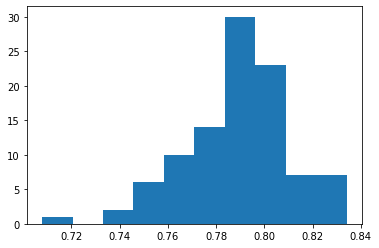

In [58]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = DecisionTreeClassifier(random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.7825112107623319
Acc:  0.7707865168539326
Acc:  0.7892376681614349
Acc:  0.7797752808988764
Acc:  0.7892376681614349
Acc:  0.7820224719101123
Acc:  0.7847533632286996
Acc:  0.7685393258426966
Acc:  0.8071748878923767
Acc:  0.8134831460674158
Acc:  0.8116591928251121
Acc:  0.8044943820224719
Acc:  0.8251121076233184
Acc:  0.7842696629213484
Acc:  0.7959641255605381
Acc:  0.7887640449438202
Acc:  0.8116591928251121
Acc:  0.7887640449438202
Acc:  0.7869955156950673
Acc:  0.8089887640449438

Acc média:  0.7894810298785712


(array([ 1.,  0.,  2.,  6., 12., 17., 38., 25., 11.,  8.]),
 array([0.70786517, 0.72048672, 0.73310828, 0.74572983, 0.75835139,
        0.77097294, 0.7835945 , 0.79621605, 0.80883761, 0.82145916,
        0.83408072]),
 <a list of 10 Patch objects>)

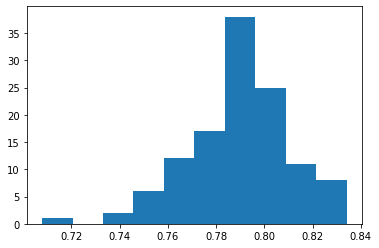

In [59]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = KNeighborsClassifier()
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.8116591928251121
Acc:  0.7820224719101123
Acc:  0.8295964125560538
Acc:  0.7842696629213484
Acc:  0.804932735426009
Acc:  0.802247191011236
Acc:  0.8161434977578476
Acc:  0.7730337078651686
Acc:  0.8251121076233184
Acc:  0.797752808988764
Acc:  0.8026905829596412
Acc:  0.8202247191011236
Acc:  0.8318385650224215
Acc:  0.7775280898876404
Acc:  0.7892376681614349
Acc:  0.7842696629213484
Acc:  0.8139013452914798
Acc:  0.7932584269662921
Acc:  0.8183856502242153
Acc:  0.8112359550561797

Acc média:  0.7914790288564663


(array([ 1.,  0.,  2.,  6., 12., 20., 42., 29., 17., 11.]),
 array([0.70786517, 0.72048672, 0.73310828, 0.74572983, 0.75835139,
        0.77097294, 0.7835945 , 0.79621605, 0.80883761, 0.82145916,
        0.83408072]),
 <a list of 10 Patch objects>)

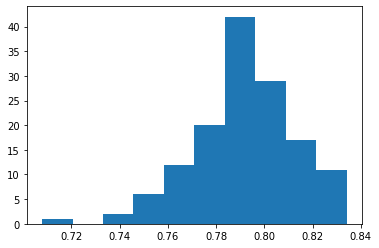

In [60]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = SVC(random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.8026905829596412
Acc:  0.7662921348314606
Acc:  0.7869955156950673
Acc:  0.7842696629213484
Acc:  0.7869955156950673
Acc:  0.7932584269662921
Acc:  0.804932735426009
Acc:  0.7887640449438202
Acc:  0.7937219730941704
Acc:  0.7842696629213484
Acc:  0.7869955156950673
Acc:  0.7955056179775281
Acc:  0.8094170403587444
Acc:  0.7752808988764045
Acc:  0.7959641255605381
Acc:  0.7775280898876404
Acc:  0.8139013452914798
Acc:  0.7685393258426966
Acc:  0.7914798206278026
Acc:  0.7932584269662921

Acc média:  0.7912945281402731


(array([ 1.,  0.,  2.,  6., 14., 22., 54., 31., 19., 11.]),
 array([0.70786517, 0.72048672, 0.73310828, 0.74572983, 0.75835139,
        0.77097294, 0.7835945 , 0.79621605, 0.80883761, 0.82145916,
        0.83408072]),
 <a list of 10 Patch objects>)

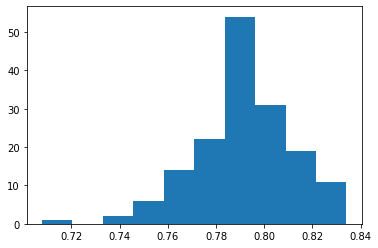

In [61]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LinearSVC(random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.7892376681614349
Acc:  0.7797752808988764
Acc:  0.8116591928251121
Acc:  0.7685393258426966
Acc:  0.7847533632286996
Acc:  0.7865168539325843
Acc:  0.804932735426009
Acc:  0.7685393258426966
Acc:  0.8071748878923767
Acc:  0.7685393258426966
Acc:  0.7959641255605381
Acc:  0.7820224719101123
Acc:  0.8139013452914798
Acc:  0.7730337078651686
Acc:  0.7757847533632287
Acc:  0.7910112359550562
Acc:  0.8094170403587444
Acc:  0.7797752808988764
Acc:  0.8004484304932735
Acc:  0.7797752808988764

Acc média:  0.7909884785274012


(array([ 1.,  0.,  2.,  6., 17., 28., 59., 34., 22., 11.]),
 array([0.70786517, 0.72048672, 0.73310828, 0.74572983, 0.75835139,
        0.77097294, 0.7835945 , 0.79621605, 0.80883761, 0.82145916,
        0.83408072]),
 <a list of 10 Patch objects>)

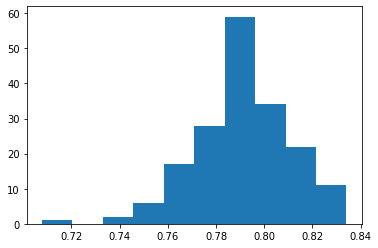

In [62]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = GaussianNB()
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.5672645739910314
Acc:  0.7573033707865169
Acc:  0.7443946188340808
Acc:  0.7662921348314606
Acc:  0.7488789237668162
Acc:  0.755056179775281
Acc:  0.7690582959641256
Acc:  0.6539325842696629
Acc:  0.5179372197309418
Acc:  0.39325842696629215
Acc:  0.6681614349775785
Acc:  0.7056179775280899
Acc:  0.7242152466367713
Acc:  0.7235955056179775
Acc:  0.7376681614349776
Acc:  0.6404494382022472
Acc:  0.7242152466367713
Acc:  0.7168539325842697
Acc:  0.7668161434977578
Acc:  0.7662921348314606

Acc média:  0.7811259384289818


(array([ 1.,  0.,  1.,  1.,  0.,  2.,  1., 10., 91., 93.]),
 array([0.39325843, 0.43734066, 0.48142289, 0.52550511, 0.56958734,
        0.61366957, 0.6577518 , 0.70183403, 0.74591626, 0.78999849,
        0.83408072]),
 <a list of 10 Patch objects>)

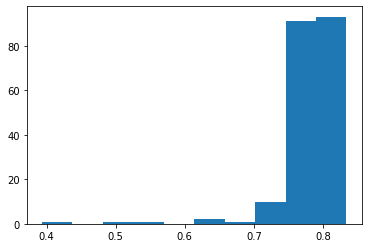

In [63]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = Perceptron(random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

Acc:  0.4551569506726457
Acc:  0.750561797752809
Acc:  0.7757847533632287
Acc:  0.7797752808988764
Acc:  0.7825112107623319
Acc:  0.7370786516853932
Acc:  0.7802690582959642
Acc:  0.7146067415730337
Acc:  0.7645739910313901
Acc:  0.7775280898876404
Acc:  0.7869955156950673
Acc:  0.6494382022471911
Acc:  0.8026905829596412
Acc:  0.750561797752809
Acc:  0.7982062780269058
Acc:  0.7752808988764045
Acc:  0.6928251121076233
Acc:  0.7707865168539326
Acc:  0.7982062780269058
Acc:  0.7573033707865169

Acc média:  0.7778424034775121


(array([  1.,   1.,   1.,   1.,   0.,   3.,   2.,  12., 103.,  96.]),
 array([0.39325843, 0.43734066, 0.48142289, 0.52550511, 0.56958734,
        0.61366957, 0.6577518 , 0.70183403, 0.74591626, 0.78999849,
        0.83408072]),
 <a list of 10 Patch objects>)

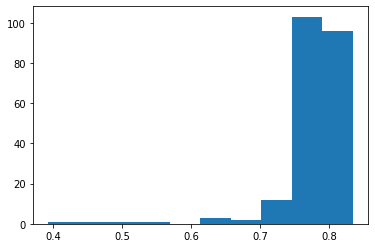

In [64]:
kf = RepeatedKFold(n_splits=2, n_repeats=10 , random_state=10)
for train_lines, test_lines in kf.split(x):
    x_train = x.iloc[train_lines]
    x_test = x.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = SGDClassifier(random_state=0)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))    
from matplotlib.pyplot import hist
hist(resultados_acc)

In [65]:
modelo2 = LogisticRegression(random_state=0)
modelo2.fit(x,y)
y_predict = modelo2.predict(x_predict)
resultados = pd.Series(y_predict, index=predict['PassengerId'], name='Survived')
resultados.to_csv('Resultados_LR.csv', header=True )

In [66]:
#outra maneira de encontrar os titulos
exemp = train.copy()
exemp['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
#str.extract separa so o arg passado
# arg deve ser uma expressão regular python (pesquisar +)
# '([ Letras a serem consideradas])'
# + indica pegar a paravra completa
#\. indica o que vem antes do ponto (.) 
exemp.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_num  Embarked_num  \
0      0         A/5 21171   7.2500   NaN        S        0           1.0   
1      0          PC 17599  71.2833   C85        C        1           2.0   
2      0  STON/O2. 3101282   7.9250   NaN        S        1           1.0   
3      0            113803  53.1000  C123        S        1           1.0   
4      0            373450   8.0500   NaN        S        0           1.0   

   Title_num Title  
0          1    Mr  
1          0   Mrs  
2          3  Miss  
3          0   Mrs  
4          1    Mr